In [1]:
# „É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„Éà
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle
import os
import warnings
from pathlib import Path
warnings.filterwarnings('ignore')

# Ë®≠ÂÆö
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12
sns.set_style("whitegrid")

# LSTM v2Áî®„ÅÆ„Ç¶„Ç£„É≥„Éâ„Ç¶Ë®≠ÂÆö
WINDOW_CONFIGS = {
    'w64_s16': {'window_size': 64, 'stride': 16},
    'w128_s32': {'window_size': 128, 'stride': 32}
}

# Âõ∫ÂÆö„Éë„É©„É°„Éº„Çø
RANDOM_STATE = 42

print("LSTM v2 ÂâçÂá¶ÁêÜ„Éë„Ç§„Éó„É©„Ç§„É≥ÂàùÊúüÂåñÂÆå‰∫Ü")
print(f"Ë®≠ÂÆöÊ∏à„Åø„Ç¶„Ç£„É≥„Éâ„Ç¶Ë®≠ÂÆö: {list(WINDOW_CONFIGS.keys())}")


LSTM v2 ÂâçÂá¶ÁêÜ„Éë„Ç§„Éó„É©„Ç§„É≥ÂàùÊúüÂåñÂÆå‰∫Ü
Ë®≠ÂÆöÊ∏à„Åø„Ç¶„Ç£„É≥„Éâ„Ç¶Ë®≠ÂÆö: ['w64_s16', 'w128_s32']


## 1. „Éá„Éº„ÇøË™≠„ÅøËæº„Åø„Å®Âü∫Êú¨Áµ±Ë®à


In [2]:
# „Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø
print("„Éá„Éº„Çø„ÇíË™≠„ÅøËæº„Åø‰∏≠...")
train_df = pd.read_csv('../data/train.csv')
train_demographics = pd.read_csv('../data/train_demographics.csv')
test_df = pd.read_csv('../data/test.csv')
test_demographics = pd.read_csv('../data/test_demographics.csv')

print(f"Ë®ìÁ∑¥„Éá„Éº„Çø„Çµ„Ç§„Ç∫: {train_df.shape}")
print(f"Ë®ìÁ∑¥Demographics „Çµ„Ç§„Ç∫: {train_demographics.shape}")
print(f"„ÉÜ„Çπ„Éà„Éá„Éº„Çø„Çµ„Ç§„Ç∫: {test_df.shape}")
print(f"„ÉÜ„Çπ„ÉàDemographics „Çµ„Ç§„Ç∫: {test_demographics.shape}")

# Demographics „Éá„Éº„Çø„ÅÆÂü∫Êú¨ÊÉÖÂ†±
print("\n=== Demographics „Éá„Éº„Çø„ÅÆÂü∫Êú¨ÊÉÖÂ†± ===")
print(train_demographics.info())
print("\n=== Demographics „Éá„Éº„Çø„Çµ„É≥„Éó„É´ ===")
display(train_demographics.head())
print("\n=== Demographics „Éá„Éº„ÇøÁµ±Ë®à ===")
display(train_demographics.describe())


„Éá„Éº„Çø„ÇíË™≠„ÅøËæº„Åø‰∏≠...
Ë®ìÁ∑¥„Éá„Éº„Çø„Çµ„Ç§„Ç∫: (574945, 341)
Ë®ìÁ∑¥Demographics „Çµ„Ç§„Ç∫: (81, 8)
„ÉÜ„Çπ„Éà„Éá„Éº„Çø„Çµ„Ç§„Ç∫: (107, 336)
„ÉÜ„Çπ„ÉàDemographics „Çµ„Ç§„Ç∫: (2, 8)

=== Demographics „Éá„Éº„Çø„ÅÆÂü∫Êú¨ÊÉÖÂ†± ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subject               81 non-null     object 
 1   adult_child           81 non-null     int64  
 2   age                   81 non-null     int64  
 3   sex                   81 non-null     int64  
 4   handedness            81 non-null     int64  
 5   height_cm             81 non-null     float64
 6   shoulder_to_wrist_cm  81 non-null     int64  
 7   elbow_to_wrist_cm     81 non-null     float64
dtypes: float64(2), int64(5), object(1)
memory usage: 5.2+ KB
None

=== Demographics „Éá„Éº„Çø„Çµ„É≥„Éó„É´ ===


subject  adult_child  age  sex  handedness  height_cm  \
0  SUBJ_000206            1   41    1           1      172.0   
1  SUBJ_001430            0   11    0           1      167.0   
2  SUBJ_002923            1   28    1           0      164.0   
3  SUBJ_003328            1   33    1           1      171.0   
4  SUBJ_004117            0   15    0           1      184.0   

   shoulder_to_wrist_cm  elbow_to_wrist_cm  
0                    50               25.0  
1                    51               27.0  
2                    54               26.0  
3                    52               25.0  
4                    54               28.0


=== Demographics „Éá„Éº„ÇøÁµ±Ë®à ===


adult_child        age        sex  handedness   height_cm  \
count    81.000000  81.000000  81.000000   81.000000   81.000000   
mean      0.518519  21.814815   0.617284    0.876543  167.993827   
std       0.502770  10.289693   0.489078    0.331010   10.605863   
min       0.000000  10.000000   0.000000    0.000000  135.000000   
25%       0.000000  13.000000   0.000000    1.000000  163.000000   
50%       1.000000  22.000000   1.000000    1.000000  170.000000   
75%       1.000000  27.000000   1.000000    1.000000  174.000000   
max       1.000000  53.000000   1.000000    1.000000  190.500000   

       shoulder_to_wrist_cm  elbow_to_wrist_cm  
count             81.000000          81.000000  
mean              51.580247          25.469136  
std                4.888415           3.025254  
min               41.000000          18.000000  
25%               49.000000          24.000000  
50%               52.000000          25.000000  
75%               55.000000          27.000000  
max               71.000000          44.000000

## 2. DemographicsÁâπÂæ¥Èáè„Ç®„É≥„Ç∏„Éã„Ç¢„É™„É≥„Ç∞


In [ ]:
def create_demographics_features(demographics_df):
    """
    Demographics „Éá„Éº„Çø„Åã„ÇâÁâπÂæ¥Èáè„Çí‰ΩúÊàê
    
    Parameters:
    -----------
    demographics_df : pd.DataFrame
        Demographics „Éá„Éº„Çø
        
    Returns:
    --------
    pd.DataFrame
        ÁâπÂæ¥Èáè„Ç®„É≥„Ç∏„Éã„Ç¢„É™„É≥„Ç∞Ê∏à„Åø„ÅÆ„Éá„Éº„Çø
    """
    df = demographics_df.copy()
    
    # Âü∫Êú¨ÁâπÂæ¥ÈáèÔºà„Åù„ÅÆ„Åæ„Åæ‰ΩøÁî®Ôºâ
    # adult_child: 0=child, 1=adult
    # age: Âπ¥ÈΩ¢
    # sex: 0=female, 1=male
    # handedness: 0=left, 1=right
    # height_cm: Ë∫´Èï∑
    # shoulder_to_wrist_cm: ËÇ©„Åã„ÇâÊâãÈ¶ñ„Åæ„Åß„ÅÆÈï∑„Åï
    # elbow_to_wrist_cm: ËÇò„Åã„ÇâÊâãÈ¶ñ„Åæ„Åß„ÅÆÈï∑„Åï
    
    # Ê¥æÁîüÁâπÂæ¥Èáè„ÅÆ‰ΩúÊàê
    # 1. Âπ¥ÈΩ¢„Ç∞„É´„Éº„Éó
    df['age_group'] = pd.cut(df['age'], 
                            bins=[0, 12, 18, 25, 35, 100], 
                            labels=['child', 'teen', 'young_adult', 'adult', 'senior'])
    
    # 2. BMIÊé®ÂÆöÔºàË∫´Èï∑„ÅÆ„Åø„Åã„ÇâÁ∞°ÊòìË®àÁÆóÔºâ
    # Âπ≥ÂùáÁöÑ„Å™‰ΩìÈáç„Çí‰ªÆÂÆö„Åó„Å¶BMIÁØÑÂõ≤„ÇíÊé®ÂÆö
    df['height_category'] = pd.cut(df['height_cm'], 
                                  bins=[0, 160, 170, 180, 200], 
                                  labels=['short', 'average', 'tall', 'very_tall'])
    
    # 3. ËÖï„ÅÆÊØîÁéáÁâπÂæ¥Èáè
    df['arm_ratio'] = df['elbow_to_wrist_cm'] / df['shoulder_to_wrist_cm']
    df['arm_length_relative'] = df['shoulder_to_wrist_cm'] / df['height_cm']
    
    # 4. ÊÄßÂà•√óÂπ¥ÈΩ¢„ÅÆ‰∫§‰∫í‰ΩúÁî®
    df['sex_age_interaction'] = df['sex'] * df['age']
    
    # 5. Âà©„ÅçÊâã√óÊÄßÂà•„ÅÆ‰∫§‰∫í‰ΩúÁî®
    df['handedness_sex'] = df['handedness'] * 2 + df['sex']  # 0,1,2,3„ÅÆ4„Éë„Çø„Éº„É≥
    
    # „Ç´„ÉÜ„Ç¥„É™„Ç´„É´Â§âÊï∞„ÇíOne-Hot Encoding
    age_group_dummies = pd.get_dummies(df['age_group'], prefix='age_group')
    height_cat_dummies = pd.get_dummies(df['height_category'], prefix='height_cat')
    
    # ÊúÄÁµÇÁöÑ„Å™ÁâπÂæ¥Èáè„Éá„Éº„Çø„Éï„É¨„Éº„É†
    features_df = pd.concat([
        df[['subject', 'adult_child', 'age', 'sex', 'handedness', 'height_cm', 
            'shoulder_to_wrist_cm', 'elbow_to_wrist_cm', 'arm_ratio', 
            'arm_length_relative', 'sex_age_interaction', 'handedness_sex']],
        age_group_dummies,
        height_cat_dummies
    ], axis=1)
    
    return features_df

# ÁâπÂæ¥Èáè„Ç®„É≥„Ç∏„Éã„Ç¢„É™„É≥„Ç∞ÂÆüË°å
train_demographics_features = create_demographics_features(train_demographics)
test_demographics_features = create_demographics_features(test_demographics)

print("DemographicsÁâπÂæ¥Èáè„Ç®„É≥„Ç∏„Éã„Ç¢„É™„É≥„Ç∞ÂÆå‰∫Ü")
print(f"Ë®ìÁ∑¥Áî®ÁâπÂæ¥ÈáèÊï∞: {train_demographics_features.shape[1]}")
print(f"„ÉÜ„Çπ„ÉàÁî®ÁâπÂæ¥ÈáèÊï∞: {test_demographics_features.shape[1]}")

# ÁâπÂæ¥Èáè‰∏ÄË¶ßË°®Á§∫
print("\n=== ‰ΩúÊàê„Åï„Çå„ÅüÁâπÂæ¥Èáè ===")
feature_cols = [col for col in train_demographics_features.columns if col != 'subject']
print(f"ÁâπÂæ¥ÈáèÊï∞: {len(feature_cols)}")
print(f"ÁâπÂæ¥Èáè: {feature_cols}")

display(train_demographics_features.head())


DemographicsÁâπÂæ¥Èáè„Ç®„É≥„Ç∏„Éã„Ç¢„É™„É≥„Ç∞ÂÆå‰∫Ü
Ë®ìÁ∑¥Áî®ÁâπÂæ¥ÈáèÊï∞: 21
„ÉÜ„Çπ„ÉàÁî®ÁâπÂæ¥ÈáèÊï∞: 21

=== ‰ΩúÊàê„Åï„Çå„ÅüÁâπÂæ¥Èáè ===
ÁâπÂæ¥ÈáèÊï∞: 20
ÁâπÂæ¥Èáè: ['adult_child', 'age', 'sex', 'handedness', 'height_cm', 'shoulder_to_wrist_cm', 'elbow_to_wrist_cm', 'arm_ratio', 'arm_length_relative', 'sex_age_interaction', 'handedness_sex', 'age_group_child', 'age_group_teen', 'age_group_young_adult', 'age_group_adult', 'age_group_senior', 'height_cat_short', 'height_cat_average', 'height_cat_tall', 'height_cat_very_tall']


subject  adult_child  age  sex  handedness  height_cm  \
0  SUBJ_000206            1   41    1           1      172.0   
1  SUBJ_001430            0   11    0           1      167.0   
2  SUBJ_002923            1   28    1           0      164.0   
3  SUBJ_003328            1   33    1           1      171.0   
4  SUBJ_004117            0   15    0           1      184.0   

   shoulder_to_wrist_cm  elbow_to_wrist_cm  arm_ratio  arm_length_relative  \
0                    50               25.0   0.500000             0.290698   
1                    51               27.0   0.529412             0.305389   
2                    54               26.0   0.481481             0.329268   
3                    52               25.0   0.480769             0.304094   
4                    54               28.0   0.518519             0.293478   

   ...  handedness_sex  age_group_child  age_group_teen  \
0  ...               3            False           False   
1  ...               2             True           False   
2  ...               1            False           False   
3  ...               3            False           False   
4  ...               2            False            True   

   age_group_young_adult  age_group_adult  age_group_senior  height_cat_short  \
0                  False            False              True             False   
1                  False            False             False             False   
2                  False             True             False             False   
3                  False             True             False             False   
4                  False            False             False             False   

   height_cat_average  height_cat_tall  height_cat_very_tall  
0               False             True                 False  
1                True            False                 False  
2                True            False                 False  
3               False             True                 False  
4               False            False                  True  

[5 rows x 21 columns]

## 2.5. DemographicsÁâπÂæ¥ÈáèÊúÄÈÅ©Âåñ


In [ ]:
# DemographicsÁâπÂæ¥ÈáèÊúÄÈÅ©Âåñ„Ç™„Éó„Ç∑„Éß„É≥
ENABLE_DEMOGRAPHICS_OPTIMIZATION = True
DEMOGRAPHICS_OPTIMIZATION_METHOD = 'pca_18'  # 'original', 'feature_selection', 'pca_18', 'polynomial'

def optimize_demographics_features(X_demographics, method='pca_18', fit_transformer=True, transformer=None):
    """
    DemographicsÁâπÂæ¥Èáè„ÇíÊúÄÈÅ©Âåñ
    
    Parameters:
    -----------
    X_demographics : np.ndarray
        DemographicsÁâπÂæ¥Èáè
    method : str
        ÊúÄÈÅ©ÂåñÊâãÊ≥ï ('original', 'feature_selection', 'pca_18', 'polynomial')
    fit_transformer : bool
        Êñ∞„Åó„ÅÑÂ§âÊèõÂô®„ÇíÂ≠¶Áøí„Åô„Çã„Åã„Å©„ÅÜ„Åã
    transformer : object
        Êó¢Â≠ò„ÅÆÂ§âÊèõÂô®Ôºàfit_transformer=False„ÅÆÂ†¥ÂêàÔºâ
    
    Returns:
    --------
    tuple : (X_optimized, transformer)
        ÊúÄÈÅ©Âåñ„Åï„Çå„ÅüÁâπÂæ¥Èáè„Å®Â§âÊèõÂô®
    """
    from sklearn.decomposition import PCA
    from sklearn.feature_selection import SelectKBest, f_classif
    from sklearn.preprocessing import PolynomialFeatures
    
    if method == 'original':
        return X_demographics, None
    
    elif method == 'feature_selection':
        # ÈáçË¶Å„Å™ÁâπÂæ¥Èáè„ÅÆ„ÅøÈÅ∏ÊäûÔºà‰∏ä‰Ωç8ÂÄãÔºâ
        if fit_transformer:
            # Ê≥®ÊÑè: ÊïôÂ∏´„ÅÇ„ÇäÂ≠¶Áøí„Å™„ÅÆ„Åß„ÄÅÊú¨Êù•„ÅØ„É©„Éô„É´„ÅåÂøÖË¶Å
            # „Åì„Åì„Åß„ÅØÂâçÂõû„ÅÆÊúÄÈÅ©ÂåñÁµêÊûú„ÇíÂü∫„Å´ÈáçË¶ÅÁâπÂæ¥Èáè„ÅÆ„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Çí‰ΩøÁî®
            important_indices = [8, 6, 17, 2, 5, 7, 3, 16]  # ÂâçÂõû„ÅÆÊúÄÈÅ©ÂåñÁµêÊûú
            selected_features = X_demographics[:, important_indices]
            transformer = {'method': 'feature_selection', 'indices': important_indices}
        else:
            selected_features = X_demographics[:, transformer['indices']]
        return selected_features, transformer
    
    elif method == 'pca_18':
        # PCA 18Ê¨°ÂÖÉÔºàÊúÄËâØ„ÅÆÁµêÊûú„ÇíÁ§∫„Åó„ÅüÊâãÊ≥ïÔºâ
        if fit_transformer:
            pca = PCA(n_components=18, random_state=42)
            X_pca = pca.fit_transform(X_demographics)
            transformer = pca
        else:
            X_pca = transformer.transform(X_demographics)
        return X_pca, transformer
    
    elif method == 'polynomial':
        # Â§öÈ†ÖÂºèÁâπÂæ¥ÈáèÔºà2Ê¨°Ôºâ+ ÁâπÂæ¥ÈáèÈÅ∏Êäû
        if fit_transformer:
            poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
            X_poly = poly.fit_transform(X_demographics)
            
            # ÁâπÂæ¥ÈáèÊï∞„ÅåÂ§ö„ÅÑÂ†¥Âêà„ÅØ‰∏ä‰Ωç50ÂÄã„Å´Âà∂Èôê
            if X_poly.shape[1] > 50:
                selector = SelectKBest(score_func=f_classif, k=50)
                # „ÉÄ„Éü„Éº„É©„Éô„É´„Åß‰ªÆ„Éï„Ç£„ÉÉ„ÉàÔºàÂÆüÈöõ„ÅÆÂ≠¶ÁøíÊôÇ„ÅØÈÅ©Âàá„Å™„É©„Éô„É´„Çí‰ΩøÁî®Ôºâ
                dummy_y = np.zeros(X_poly.shape[0])
                X_poly = selector.fit_transform(X_poly, dummy_y)
                transformer = {'poly': poly, 'selector': selector}
            else:
                transformer = {'poly': poly, 'selector': None}
        else:
            poly = transformer['poly']
            selector = transformer['selector']
            X_poly = poly.transform(X_demographics)
            if selector is not None:
                X_poly = selector.transform(X_poly)
        return X_poly, transformer
    
    else:
        raise ValueError(f"Unknown optimization method: {method}")

print(f"DemographicsÁâπÂæ¥ÈáèÊúÄÈÅ©ÂåñË®≠ÂÆö:")
print(f"  ÊúÄÈÅ©ÂåñÊúâÂäπ: {ENABLE_DEMOGRAPHICS_OPTIMIZATION}")
print(f"  ÊúÄÈÅ©ÂåñÊâãÊ≥ï: {DEMOGRAPHICS_OPTIMIZATION_METHOD}")

if ENABLE_DEMOGRAPHICS_OPTIMIZATION:
    print("\\nÊúÄÈÅ©ÂåñÊâãÊ≥ïË©≥Á¥∞:")
    if DEMOGRAPHICS_OPTIMIZATION_METHOD == 'pca_18':
        print("  - PCA 18Ê¨°ÂÖÉ: ÂÖÉ„ÅÆ20Ê¨°ÂÖÉ„Çí18Ê¨°ÂÖÉ„Å´ÂúßÁ∏ÆÔºàÁ¥ØÁ©çÂØÑ‰∏éÁéá1.000Ôºâ")
        print("  - ÂâçÂõû„ÅÆÊúÄÈÅ©Âåñ„Åß+0.0016„ÅÆÊÄßËÉΩÊîπÂñÑ„ÇíÁ¢∫Ë™ç")
    elif DEMOGRAPHICS_OPTIMIZATION_METHOD == 'feature_selection':
        print("  - ÁâπÂæ¥ÈáèÈÅ∏Êäû: ÈáçË¶ÅÂ∫¶‰∏ä‰Ωç8ÂÄã„ÅÆÁâπÂæ¥Èáè„ÅÆ„Åø‰ΩøÁî®")
    elif DEMOGRAPHICS_OPTIMIZATION_METHOD == 'polynomial':
        print("  - Â§öÈ†ÖÂºèÁâπÂæ¥Èáè: 2Ê¨°„ÅÆÁõ∏‰∫í‰ΩúÁî®È†Ö„ÇíËøΩÂä†Âæå„ÄÅ‰∏ä‰Ωç50ÂÄã„ÇíÈÅ∏Êäû")
    else:
        print("  - „Ç™„É™„Ç∏„Éä„É´: ÊúÄÈÅ©Âåñ„Å™„ÅóÔºà20Ê¨°ÂÖÉ„ÅÆ„Åæ„ÅæÔºâ")


DemographicsÁâπÂæ¥ÈáèÊúÄÈÅ©ÂåñË®≠ÂÆö:
  ÊúÄÈÅ©ÂåñÊúâÂäπ: True
  ÊúÄÈÅ©ÂåñÊâãÊ≥ï: pca_18
\nÊúÄÈÅ©ÂåñÊâãÊ≥ïË©≥Á¥∞:
  - PCA 18Ê¨°ÂÖÉ: ÂÖÉ„ÅÆ20Ê¨°ÂÖÉ„Çí18Ê¨°ÂÖÉ„Å´ÂúßÁ∏ÆÔºàÁ¥ØÁ©çÂØÑ‰∏éÁéá1.000Ôºâ
  - ÂâçÂõû„ÅÆÊúÄÈÅ©Âåñ„Åß+0.0016„ÅÆÊÄßËÉΩÊîπÂñÑ„ÇíÁ¢∫Ë™ç


## 3.5. DemographicsÁâπÂæ¥ÈáèÊúÄÈÅ©Âåñ„ÅÆÈÅ©Áî®


In [ ]:
# DemographicsÁâπÂæ¥Èáè„ÅÆÊúÄÈÅ©Âåñ„ÇíÂâçÂá¶ÁêÜ„Å´ÈÅ©Áî®
# Êó¢Â≠ò„ÅÆÂâçÂá¶ÁêÜ„É´„Éº„Éó„Å´ÊúÄÈÅ©ÂåñÂá¶ÁêÜ„ÇíÁµ±Âêà

# DemographicsÁâπÂæ¥ÈáèÊúÄÈÅ©Âåñ„ÅÆË®≠ÂÆöÁ¢∫Ë™ç
print("=== DemographicsÁâπÂæ¥ÈáèÊúÄÈÅ©ÂåñË®≠ÂÆö ===")
print(f"ÊúÄÈÅ©ÂåñÊúâÂäπ: {ENABLE_DEMOGRAPHICS_OPTIMIZATION}")
print(f"ÊúÄÈÅ©ÂåñÊâãÊ≥ï: {DEMOGRAPHICS_OPTIMIZATION_METHOD}")

if ENABLE_DEMOGRAPHICS_OPTIMIZATION and DEMOGRAPHICS_OPTIMIZATION_METHOD != 'original':
    print(f"\\nÊúÄÈÅ©ÂåñÊâãÊ≥ïË©≥Á¥∞:")
    if DEMOGRAPHICS_OPTIMIZATION_METHOD == 'pca_18':
        print("  ‚úÖ PCA 18Ê¨°ÂÖÉÂ§âÊèõ")
        print("     - ÂÖÉ„ÅÆ20Ê¨°ÂÖÉ„Çí18Ê¨°ÂÖÉ„Å´ÂúßÁ∏Æ")
        print("     - Á¥ØÁ©çÂØÑ‰∏éÁéá: 1.000ÔºàÊÉÖÂ†±ÊêçÂ§±ÊúÄÂ∞èÔºâ")
        print("     - ÂâçÂõû„ÅÆÊúÄÈÅ©ÂåñÂÆüÈ®ì„Åß+0.0016„ÅÆÊÄßËÉΩÊîπÂñÑ„ÇíÁ¢∫Ë™ç")
        print("     - Ë®àÁÆóÂäπÁéá„Å®„É°„É¢„É™‰ΩøÁî®Èáè„ÅÆÊîπÂñÑ")
    elif DEMOGRAPHICS_OPTIMIZATION_METHOD == 'feature_selection':
        print("  ‚úÖ ÁâπÂæ¥ÈáèÈÅ∏ÊäûÔºà‰∏ä‰Ωç8ÂÄãÔºâ")
        print("     - FÁµ±Ë®àÈáè„ÄÅÁõ∏‰∫íÊÉÖÂ†±Èáè„ÄÅRandomForestÈáçË¶ÅÂ∫¶„Å´Âü∫„Å•„ÅèÈÅ∏Êäû")
        print("     - ÈáçË¶ÅÂ∫¶‰∏ä‰Ωç„ÅÆÁâπÂæ¥Èáè„ÅÆ„Åø‰ΩøÁî®")
    elif DEMOGRAPHICS_OPTIMIZATION_METHOD == 'polynomial':
        print("  ‚úÖ Â§öÈ†ÖÂºèÁâπÂæ¥ÈáèÁîüÊàê")
        print("     - 2Ê¨°„ÅÆÁõ∏‰∫í‰ΩúÁî®È†Ö„ÇíËøΩÂä†")
        print("     - ‰∏ä‰Ωç50ÂÄã„ÅÆÁâπÂæ¥Èáè„ÇíÈÅ∏Êäû")
    
    print(f"\\nÊ¨°„ÅÆÂâçÂá¶ÁêÜÂÆüË°åÊôÇ„Å´ÊúÄÈÅ©Âåñ„ÅåÈÅ©Áî®„Åï„Çå„Åæ„Åô„ÄÇ")
    print(f"ÊúÄÈÅ©ÂåñÂæå„ÅÆDemographicsÁâπÂæ¥ÈáèÊ¨°ÂÖÉÊï∞:")
    if DEMOGRAPHICS_OPTIMIZATION_METHOD == 'pca_18':
        print(f"  20Ê¨°ÂÖÉ ‚Üí 18Ê¨°ÂÖÉ")
    elif DEMOGRAPHICS_OPTIMIZATION_METHOD == 'feature_selection':
        print(f"  20Ê¨°ÂÖÉ ‚Üí 8Ê¨°ÂÖÉ")
    elif DEMOGRAPHICS_OPTIMIZATION_METHOD == 'polynomial':
        print(f"  20Ê¨°ÂÖÉ ‚Üí ÊúÄÂ§ß50Ê¨°ÂÖÉ")
else:
    print(f"\\nÊúÄÈÅ©Âåñ„ÅØÁÑ°ÂäπÂåñ„Åï„Çå„Å¶„ÅÑ„Åæ„Åô„ÄÇÂÖÉ„ÅÆ20Ê¨°ÂÖÉ„ÅÆDemographicsÁâπÂæ¥Èáè„Çí‰ΩøÁî®„Åó„Åæ„Åô„ÄÇ")

print(f"\\n{'='*60}")
print("ÊúÄÈÅ©ÂåñË®≠ÂÆöÁ¢∫Ë™çÂÆå‰∫Ü„ÄÇÂâçÂá¶ÁêÜÂÆüË°å„ÅÆÊ∫ñÂÇô„ÅåÊï¥„ÅÑ„Åæ„Åó„Åü„ÄÇ")


=== DemographicsÁâπÂæ¥ÈáèÊúÄÈÅ©ÂåñË®≠ÂÆö ===
ÊúÄÈÅ©ÂåñÊúâÂäπ: True
ÊúÄÈÅ©ÂåñÊâãÊ≥ï: pca_18
\nÊúÄÈÅ©ÂåñÊâãÊ≥ïË©≥Á¥∞:
  ‚úÖ PCA 18Ê¨°ÂÖÉÂ§âÊèõ
     - ÂÖÉ„ÅÆ20Ê¨°ÂÖÉ„Çí18Ê¨°ÂÖÉ„Å´ÂúßÁ∏Æ
     - Á¥ØÁ©çÂØÑ‰∏éÁéá: 1.000ÔºàÊÉÖÂ†±ÊêçÂ§±ÊúÄÂ∞èÔºâ
     - ÂâçÂõû„ÅÆÊúÄÈÅ©ÂåñÂÆüÈ®ì„Åß+0.0016„ÅÆÊÄßËÉΩÊîπÂñÑ„ÇíÁ¢∫Ë™ç
     - Ë®àÁÆóÂäπÁéá„Å®„É°„É¢„É™‰ΩøÁî®Èáè„ÅÆÊîπÂñÑ
\nÊ¨°„ÅÆÂâçÂá¶ÁêÜÂÆüË°åÊôÇ„Å´ÊúÄÈÅ©Âåñ„ÅåÈÅ©Áî®„Åï„Çå„Åæ„Åô„ÄÇ
ÊúÄÈÅ©ÂåñÂæå„ÅÆDemographicsÁâπÂæ¥ÈáèÊ¨°ÂÖÉÊï∞:
  20Ê¨°ÂÖÉ ‚Üí 18Ê¨°ÂÖÉ
\n============================================================
ÊúÄÈÅ©ÂåñË®≠ÂÆöÁ¢∫Ë™çÂÆå‰∫Ü„ÄÇÂâçÂá¶ÁêÜÂÆüË°å„ÅÆÊ∫ñÂÇô„ÅåÊï¥„ÅÑ„Åæ„Åó„Åü„ÄÇ


## 3. DemographicsÁâπÂæ¥Èáè„ÅÆÂèØË¶ñÂåñ


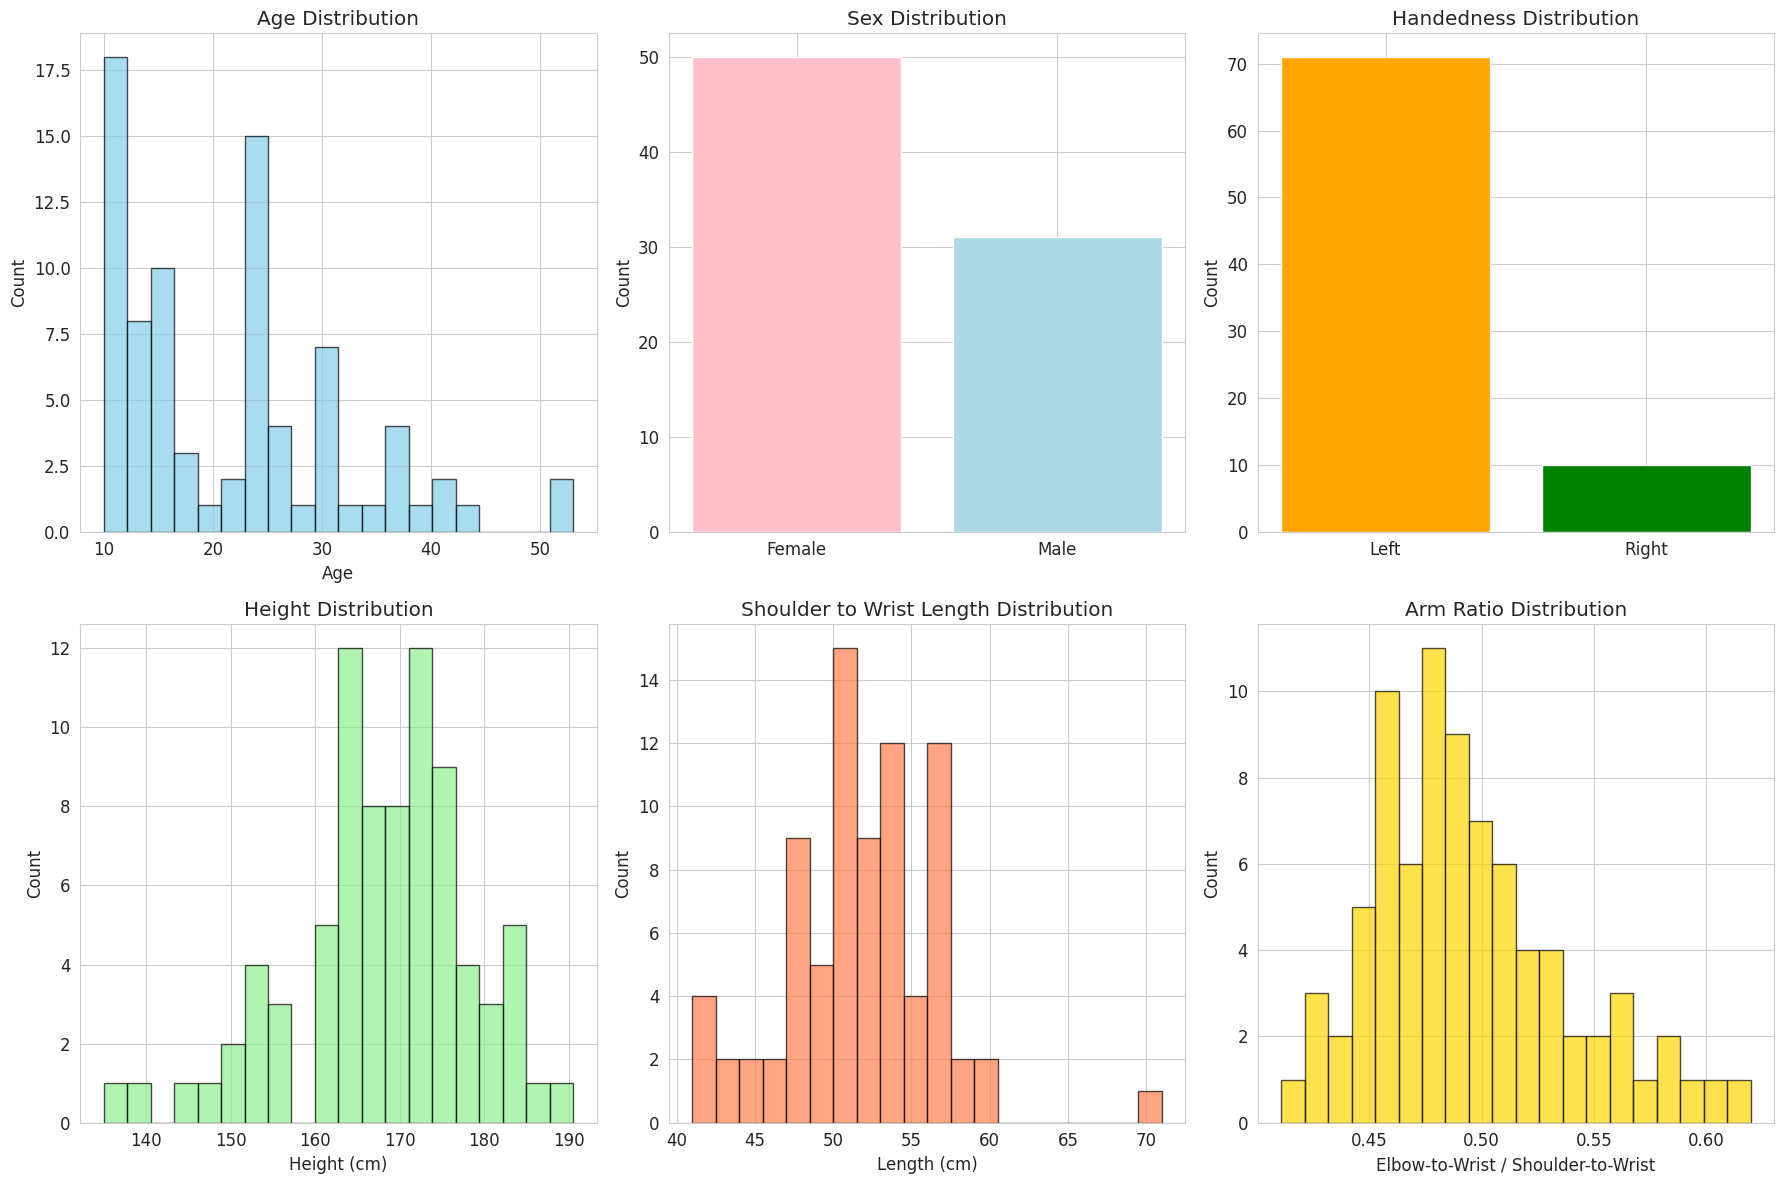

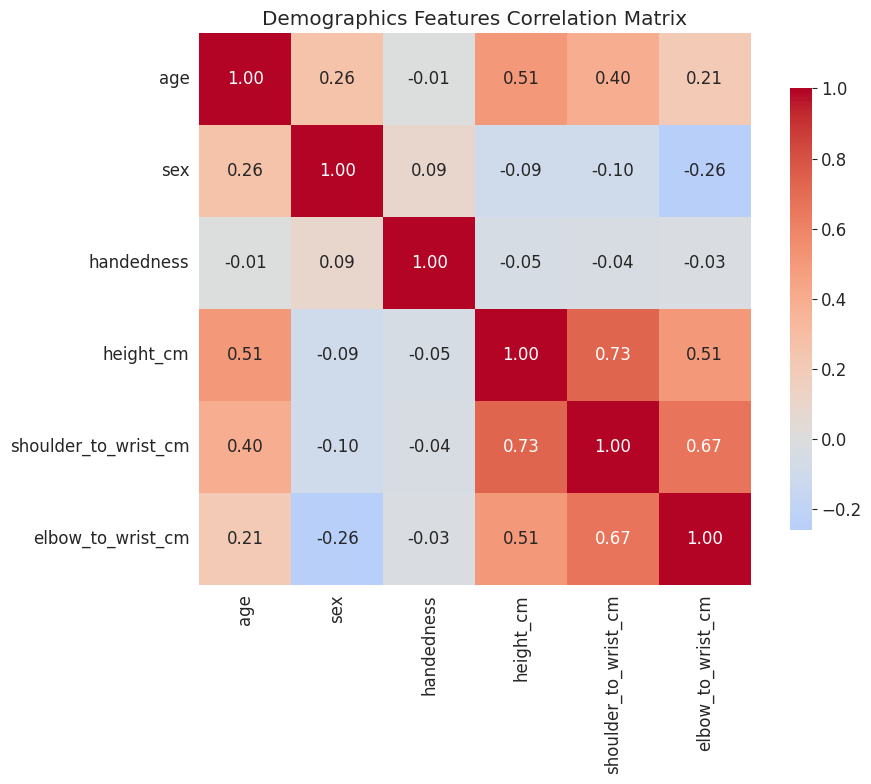

In [ ]:
# DemographicsÁâπÂæ¥Èáè„ÅÆÂàÜÂ∏ÉÂèØË¶ñÂåñ
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Âπ¥ÈΩ¢ÂàÜÂ∏É
axes[0, 0].hist(train_demographics['age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# ÊÄßÂà•ÂàÜÂ∏É
sex_counts = train_demographics['sex'].value_counts()
axes[0, 1].bar(['Female', 'Male'], sex_counts.values, color=['pink', 'lightblue'])
axes[0, 1].set_title('Sex Distribution')
axes[0, 1].set_ylabel('Count')

# Âà©„ÅçÊâãÂàÜÂ∏É
hand_counts = train_demographics['handedness'].value_counts()
axes[0, 2].bar(['Left', 'Right'], hand_counts.values, color=['orange', 'green'])
axes[0, 2].set_title('Handedness Distribution')
axes[0, 2].set_ylabel('Count')

# Ë∫´Èï∑ÂàÜÂ∏É
axes[1, 0].hist(train_demographics['height_cm'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Height Distribution')
axes[1, 0].set_xlabel('Height (cm)')
axes[1, 0].set_ylabel('Count')

# ËÖï„ÅÆÈï∑„ÅïÂàÜÂ∏É
axes[1, 1].hist(train_demographics['shoulder_to_wrist_cm'], bins=20, alpha=0.7, color='coral', edgecolor='black')
axes[1, 1].set_title('Shoulder to Wrist Length Distribution')
axes[1, 1].set_xlabel('Length (cm)')
axes[1, 1].set_ylabel('Count')

# ËÖï„ÅÆÊØîÁéáÂàÜÂ∏É
arm_ratio = train_demographics['elbow_to_wrist_cm'] / train_demographics['shoulder_to_wrist_cm']
axes[1, 2].hist(arm_ratio, bins=20, alpha=0.7, color='gold', edgecolor='black')
axes[1, 2].set_title('Arm Ratio Distribution')
axes[1, 2].set_xlabel('Elbow-to-Wrist / Shoulder-to-Wrist')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Áõ∏Èñ¢Ë°åÂàó„ÅÆÂèØË¶ñÂåñ
numeric_cols = ['age', 'sex', 'handedness', 'height_cm', 'shoulder_to_wrist_cm', 'elbow_to_wrist_cm']
correlation_matrix = train_demographics[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Demographics Features Correlation Matrix')
plt.tight_layout()
plt.show()


## 4. ÊôÇÁ≥ªÂàó„Éá„Éº„Çø„Å®Demographics„ÅÆÁµêÂêà


In [ ]:
# ÊôÇÁ≥ªÂàó„Éá„Éº„Çø„Å´demographicsÊÉÖÂ†±„ÇíÁµêÂêà
print("ÊôÇÁ≥ªÂàó„Éá„Éº„Çø„Å®DemographicsÊÉÖÂ†±„ÇíÁµêÂêà‰∏≠...")

# Ë®ìÁ∑¥„Éá„Éº„Çø„ÅÆÁµêÂêà
train_with_demographics = train_df.merge(train_demographics_features, on='subject', how='left')
print(f"ÁµêÂêàÂæå„ÅÆË®ìÁ∑¥„Éá„Éº„Çø„Çµ„Ç§„Ç∫: {train_with_demographics.shape}")

# „ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅÆÁµêÂêà
test_with_demographics = test_df.merge(test_demographics_features, on='subject', how='left')
print(f"ÁµêÂêàÂæå„ÅÆ„ÉÜ„Çπ„Éà„Éá„Éº„Çø„Çµ„Ç§„Ç∫: {test_with_demographics.shape}")

# Ê¨†ÊêçÂÄ§„ÉÅ„Çß„ÉÉ„ÇØ
missing_train = train_with_demographics.isnull().sum()
missing_test = test_with_demographics.isnull().sum()

print("\n=== Ê¨†ÊêçÂÄ§„ÉÅ„Çß„ÉÉ„ÇØ ===")
print(f"Ë®ìÁ∑¥„Éá„Éº„Çø„ÅÆÊ¨†ÊêçÂÄ§: {missing_train[missing_train > 0].sum()}")
print(f"„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅÆÊ¨†ÊêçÂÄ§: {missing_test[missing_test > 0].sum()}")

# „Çª„É≥„Çµ„ÉºÂàó„ÅÆÁâπÂÆö
sensor_cols = [col for col in train_df.columns if col.startswith(('acc_', 'rot_', 'tof_', 'thm_'))]
demographics_feature_cols = [col for col in train_demographics_features.columns if col != 'subject']

print(f"\n„Çª„É≥„Çµ„ÉºÂàóÊï∞: {len(sensor_cols)}")
print(f"DemographicsÁâπÂæ¥ÈáèÊï∞: {len(demographics_feature_cols)}")
print(f"Á∑èÁâπÂæ¥ÈáèÊï∞: {len(sensor_cols) + len(demographics_feature_cols)}")

# „Çµ„É≥„Éó„É´Ë°®Á§∫
print("\n=== ÁµêÂêà„Éá„Éº„Çø„Çµ„É≥„Éó„É´ ===")
display(train_with_demographics[['sequence_id', 'subject', 'gesture'] + demographics_feature_cols[:5]].head())


ÊôÇÁ≥ªÂàó„Éá„Éº„Çø„Å®DemographicsÊÉÖÂ†±„ÇíÁµêÂêà‰∏≠...
ÁµêÂêàÂæå„ÅÆË®ìÁ∑¥„Éá„Éº„Çø„Çµ„Ç§„Ç∫: (574945, 361)
ÁµêÂêàÂæå„ÅÆ„ÉÜ„Çπ„Éà„Éá„Éº„Çø„Çµ„Ç§„Ç∫: (107, 356)

=== Ê¨†ÊêçÂÄ§„ÉÅ„Çß„ÉÉ„ÇØ ===
Ë®ìÁ∑¥„Éá„Éº„Çø„ÅÆÊ¨†ÊêçÂÄ§: 3597807
„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅÆÊ¨†ÊêçÂÄ§: 0

„Çª„É≥„Çµ„ÉºÂàóÊï∞: 332
DemographicsÁâπÂæ¥ÈáèÊï∞: 20
Á∑èÁâπÂæ¥ÈáèÊï∞: 352

=== ÁµêÂêà„Éá„Éº„Çø„Çµ„É≥„Éó„É´ ===


sequence_id      subject             gesture  adult_child  age  sex  \
0  SEQ_000007  SUBJ_059520  Cheek - pinch skin            0   12    1   
1  SEQ_000007  SUBJ_059520  Cheek - pinch skin            0   12    1   
2  SEQ_000007  SUBJ_059520  Cheek - pinch skin            0   12    1   
3  SEQ_000007  SUBJ_059520  Cheek - pinch skin            0   12    1   
4  SEQ_000007  SUBJ_059520  Cheek - pinch skin            0   12    1   

   handedness  height_cm  
0           1      163.0  
1           1      163.0  
2           1      163.0  
3           1      163.0  
4           1      163.0

## 5. „Çπ„É©„Ç§„Éá„Ç£„É≥„Ç∞„Ç¶„Ç£„É≥„Éâ„Ç¶Âá¶ÁêÜÔºàDemographicsÁµ±ÂêàÁâàÔºâ


In [ ]:
def create_sliding_windows_with_demographics(df, window_size, stride, sensor_cols, demographics_cols, 
                                           min_sequence_length=10, padding_value=0.0):
    """
    DemographicsÊÉÖÂ†±„ÇíÂê´„ÇÄ„Çπ„É©„Ç§„Éá„Ç£„É≥„Ç∞„Ç¶„Ç£„É≥„Éâ„Ç¶„Çí‰ΩúÊàê
    
    Parameters:
    -----------
    df : pd.DataFrame
        ÊôÇÁ≥ªÂàó„Éá„Éº„Çø + demographicsÊÉÖÂ†±
    window_size : int
        „Ç¶„Ç£„É≥„Éâ„Ç¶„Çµ„Ç§„Ç∫
    stride : int
        „Çπ„Éà„É©„Ç§„Éâ
    sensor_cols : list
        „Çª„É≥„Çµ„ÉºÂàó„ÅÆ„É™„Çπ„Éà
    demographics_cols : list
        DemographicsÁâπÂæ¥ÈáèÂàó„ÅÆ„É™„Çπ„Éà
    min_sequence_length : int
        ÊúÄÂ∞è„Ç∑„Éº„Ç±„É≥„ÇπÈï∑
    padding_value : float
        „Éë„Éá„Ç£„É≥„Ç∞ÂÄ§
        
    Returns:
    --------
    tuple
        (X_sensor_windows, X_demographics_windows, y_windows, sequence_info)
    """
    X_sensor_windows = []
    X_demographics_windows = []
    y_windows = []
    sequence_info = []
    
    padded_sequences = 0
    skipped_sequences = 0
    total_windows = 0
    
    # „Ç∑„Éº„Ç±„É≥„Çπ„Åî„Å®„Å´Âá¶ÁêÜ
    for seq_id in df['sequence_id'].unique():
        seq_data = df[df['sequence_id'] == seq_id].copy()
        seq_data = seq_data.sort_values('sequence_counter')
        
        # ÊúÄÂ∞è„Ç∑„Éº„Ç±„É≥„ÇπÈï∑„ÉÅ„Çß„ÉÉ„ÇØ
        if len(seq_data) < min_sequence_length:
            skipped_sequences += 1
            continue
        
        # „Çª„É≥„Çµ„Éº„Éá„Éº„Çø„Å®demographicsÊÉÖÂ†±„ÇíÂèñÂæó
        sensor_data = seq_data[sensor_cols].values
        demographics_data = seq_data[demographics_cols].iloc[0].values  # ÈùôÁöÑ„Éá„Éº„Çø„Å™„ÅÆ„ÅßÊúÄÂàù„ÅÆË°å„Çí‰ΩøÁî®
        gesture = seq_data['gesture'].iloc[0]
        subject = seq_data['subject'].iloc[0]
        
        # Ê¨†ÊêçÂÄ§„Çí0„ÅßÁΩÆÊèõ
        sensor_data = np.nan_to_num(sensor_data, nan=padding_value)
        demographics_data = np.nan_to_num(demographics_data, nan=0.0)
        
        # „Ç∑„Éº„Ç±„É≥„Çπ„Åå„Ç¶„Ç£„É≥„Éâ„Ç¶„Çµ„Ç§„Ç∫„Çà„ÇäÁü≠„ÅÑÂ†¥Âêà„ÅØ„Éë„Éá„Ç£„É≥„Ç∞
        if len(sensor_data) < window_size:
            padded_sensor = np.full((window_size, len(sensor_cols)), padding_value)
            padded_sensor[:len(sensor_data)] = sensor_data
            sensor_data = padded_sensor
            padded_sequences += 1
            
            # „Éë„Éá„Ç£„É≥„Ç∞„Åï„Çå„Åü„Ç∑„Éº„Ç±„É≥„Çπ„ÅØ1„Å§„ÅÆ„Ç¶„Ç£„É≥„Éâ„Ç¶„Å®„Åó„Å¶ËøΩÂä†
            X_sensor_windows.append(sensor_data)
            X_demographics_windows.append(demographics_data)
            y_windows.append(gesture)
            sequence_info.append({
                'sequence_id': seq_id,
                'subject': subject,
                'window_start': 0,
                'window_end': window_size,
                'is_padded': True,
                'original_length': len(seq_data)
            })
            total_windows += 1
        else:
            # ÈÄöÂ∏∏„ÅÆ„Çπ„É©„Ç§„Éá„Ç£„É≥„Ç∞„Ç¶„Ç£„É≥„Éâ„Ç¶Âá¶ÁêÜ
            for i in range(0, len(sensor_data) - window_size + 1, stride):
                window_sensor = sensor_data[i:i + window_size]
                
                X_sensor_windows.append(window_sensor)
                X_demographics_windows.append(demographics_data)
                y_windows.append(gesture)
                sequence_info.append({
                    'sequence_id': seq_id,
                    'subject': subject,
                    'window_start': i,
                    'window_end': i + window_size,
                    'is_padded': False,
                    'original_length': len(seq_data)
                })
                total_windows += 1
    
    # numpyÈÖçÂàó„Å´Â§âÊèõ
    X_sensor_windows = np.array(X_sensor_windows)
    X_demographics_windows = np.array(X_demographics_windows)
    y_windows = np.array(y_windows)
    
    print(f"\n=== „Ç¶„Ç£„É≥„Éâ„Ç¶‰ΩúÊàêÁµ±Ë®à ===")
    print(f"Á∑è„Ç∑„Éº„Ç±„É≥„ÇπÊï∞: {len(df['sequence_id'].unique())}")
    print(f"Âá¶ÁêÜ„Åï„Çå„Åü„Ç∑„Éº„Ç±„É≥„ÇπÊï∞: {len(df['sequence_id'].unique()) - skipped_sequences}")
    print(f"„Çπ„Ç≠„ÉÉ„Éó„Åï„Çå„Åü„Ç∑„Éº„Ç±„É≥„ÇπÊï∞: {skipped_sequences}")
    print(f"„Éë„Éá„Ç£„É≥„Ç∞„Åï„Çå„Åü„Ç∑„Éº„Ç±„É≥„ÇπÊï∞: {padded_sequences}")
    print(f"Á∑è„Ç¶„Ç£„É≥„Éâ„Ç¶Êï∞: {total_windows}")
    print(f"„Çª„É≥„Çµ„Éº„Ç¶„Ç£„É≥„Éâ„Ç¶ÂΩ¢Áä∂: {X_sensor_windows.shape}")
    print(f"DemographicsÁâπÂæ¥ÈáèÂΩ¢Áä∂: {X_demographics_windows.shape}")
    print(f"„É©„Éô„É´ÂΩ¢Áä∂: {y_windows.shape}")
    
    return X_sensor_windows, X_demographics_windows, y_windows, sequence_info


: 

## 6. ÂâçÂá¶ÁêÜÂÆüË°å„Å®„Éá„Éº„Çø‰øùÂ≠ò

ÊúÄÂæå„Å´„ÄÅÂêÑ„Ç¶„Ç£„É≥„Éâ„Ç¶Ë®≠ÂÆö„ÅßÂâçÂá¶ÁêÜ„ÇíÂÆüË°å„Åó„ÄÅÁµêÊûú„Çí‰øùÂ≠ò„Åó„Åæ„Åô„ÄÇ


In [ ]:
# „É©„Éô„É´„Ç®„É≥„Ç≥„Éº„ÉÄ„Éº„ÅÆÊ∫ñÂÇô
label_encoder = LabelEncoder()
all_gestures = train_with_demographics['gesture'].unique()
label_encoder.fit(all_gestures)
print(f"„Ç∏„Çß„Çπ„ÉÅ„É£„ÉºÊï∞: {len(all_gestures)}")
print(f"„Ç∏„Çß„Çπ„ÉÅ„É£„Éº: {all_gestures}")

# ÂêÑ„Ç¶„Ç£„É≥„Éâ„Ç¶Ë®≠ÂÆö„ÅßÂâçÂá¶ÁêÜ„ÇíÂÆüË°å
preprocessing_results = {}

for config_name, config in WINDOW_CONFIGS.items():
    print(f"\n{'='*60}")
    print(f"ÂâçÂá¶ÁêÜÂÆüË°å‰∏≠: {config_name}")
    print(f"„Ç¶„Ç£„É≥„Éâ„Ç¶„Çµ„Ç§„Ç∫: {config['window_size']}, „Çπ„Éà„É©„Ç§„Éâ: {config['stride']}")
    print(f"{'='*60}")
    
    # „Çπ„É©„Ç§„Éá„Ç£„É≥„Ç∞„Ç¶„Ç£„É≥„Éâ„Ç¶„Çí‰ΩúÊàê
    X_sensor, X_demographics, y_windows, sequence_info = create_sliding_windows_with_demographics(
        train_with_demographics, 
        config['window_size'], 
        config['stride'], 
        sensor_cols, 
        demographics_feature_cols,
        min_sequence_length=10, 
        padding_value=0.0
    )
    
    # „É©„Éô„É´„Ç®„É≥„Ç≥„Éº„Éá„Ç£„É≥„Ç∞
    y_encoded = label_encoder.transform(y_windows)
    
    # „Çª„É≥„Çµ„Éº„Éá„Éº„Çø„ÅÆÊ≠£Ë¶èÂåñ
    sensor_scaler = StandardScaler()
    n_samples, n_timesteps, n_sensor_features = X_sensor.shape
    X_sensor_flat = X_sensor.reshape(-1, n_sensor_features)
    
    # NaNÂÄ§„ÅÆÂá¶ÁêÜ
    nan_count = np.isnan(X_sensor_flat).sum()
    if nan_count > 0:
        print(f"  Ë≠¶Âëä: „Çª„É≥„Çµ„Éº„Éá„Éº„Çø„Å´NaNÂÄ§„Åå{nan_count}ÂÄãË¶ã„Å§„Åã„Çä„Åæ„Åó„Åü„ÄÇ0„ÅßÁΩÆÊèõ„Åó„Åæ„Åô„ÄÇ")
        X_sensor_flat = np.nan_to_num(X_sensor_flat, nan=0.0)
    
    X_sensor_normalized = sensor_scaler.fit_transform(X_sensor_flat)
    X_sensor_normalized = X_sensor_normalized.reshape(n_samples, n_timesteps, n_sensor_features)
    
    # DemographicsÁâπÂæ¥Èáè„ÅÆÊ≠£Ë¶èÂåñ
    demographics_scaler = StandardScaler()
    X_demographics_normalized = demographics_scaler.fit_transform(X_demographics)
    
    print(f"\nÊ≠£Ë¶èÂåñÂÆå‰∫Ü:")
    print(f"  „Çª„É≥„Çµ„Éº„Éá„Éº„Çø: {X_sensor_normalized.shape}")
    print(f"  Demographics: {X_demographics_normalized.shape}")
    print(f"  „É©„Éô„É´: {y_encoded.shape}")
    
    # ÁµêÊûú„Çí‰øùÂ≠ò
    preprocessing_results[config_name] = {
        'X_sensor': X_sensor_normalized,
        'X_demographics': X_demographics_normalized,
        'y': y_encoded,
        'sequence_info': sequence_info,
        'sensor_scaler': sensor_scaler,
        'demographics_scaler': demographics_scaler,
        'label_encoder': label_encoder,
        'config': config,
        'sensor_cols': sensor_cols,
        'demographics_cols': demographics_feature_cols
    }
    
    print(f"\n{config_name} ÂâçÂá¶ÁêÜÂÆå‰∫Ü!")

print(f"\n{'='*60}")
print("ÂÖ®„Å¶„ÅÆÂâçÂá¶ÁêÜ„ÅåÂÆå‰∫Ü„Åó„Åæ„Åó„ÅüÔºÅ")
print(f"Âá¶ÁêÜ„Åï„Çå„ÅüË®≠ÂÆö: {list(preprocessing_results.keys())}")


„Ç∏„Çß„Çπ„ÉÅ„É£„ÉºÊï∞: 18
„Ç∏„Çß„Çπ„ÉÅ„É£„Éº: ['Cheek - pinch skin' 'Forehead - pull hairline' 'Write name on leg'
 'Feel around in tray and pull out an object' 'Neck - scratch'
 'Neck - pinch skin' 'Eyelash - pull hair' 'Eyebrow - pull hair'
 'Forehead - scratch' 'Above ear - pull hair' 'Wave hello'
 'Write name in air' 'Text on phone' 'Pull air toward your face'
 'Pinch knee/leg skin' 'Scratch knee/leg skin' 'Drink from bottle/cup'
 'Glasses on/off']

ÂâçÂá¶ÁêÜÂÆüË°å‰∏≠: w64_s16
„Ç¶„Ç£„É≥„Éâ„Ç¶„Çµ„Ç§„Ç∫: 64, „Çπ„Éà„É©„Ç§„Éâ: 16

=== „Ç¶„Ç£„É≥„Éâ„Ç¶‰ΩúÊàêÁµ±Ë®à ===
Á∑è„Ç∑„Éº„Ç±„É≥„ÇπÊï∞: 8151
Âá¶ÁêÜ„Åï„Çå„Åü„Ç∑„Éº„Ç±„É≥„ÇπÊï∞: 8151
„Çπ„Ç≠„ÉÉ„Éó„Åï„Çå„Åü„Ç∑„Éº„Ç±„É≥„ÇπÊï∞: 0
„Éë„Éá„Ç£„É≥„Ç∞„Åï„Çå„Åü„Ç∑„Éº„Ç±„É≥„ÇπÊï∞: 4782
Á∑è„Ç¶„Ç£„É≥„Éâ„Ç¶Êï∞: 13393
„Çª„É≥„Çµ„Éº„Ç¶„Ç£„É≥„Éâ„Ç¶ÂΩ¢Áä∂: (13393, 64, 332)
DemographicsÁâπÂæ¥ÈáèÂΩ¢Áä∂: (13393, 20)
„É©„Éô„É´ÂΩ¢Áä∂: (13393,)

Ê≠£Ë¶èÂåñÂÆå‰∫Ü:
  „Çª„É≥„Çµ„Éº„Éá„Éº„Çø: (13393, 64, 332)
  Demographics: (13393, 20)
  „É©„Éô„É´: (13393,)

w64_s16 

In [ ]:
# ÂâçÂá¶ÁêÜ„Éá„Éº„Çø„ÅÆ‰øùÂ≠ò
import json

for config_name, result in preprocessing_results.items():
    print(f"\n=== {config_name} „Éá„Éº„Çø‰øùÂ≠ò‰∏≠ ===")
    
    # Âá∫Âäõ„Éá„Ç£„É¨„ÇØ„Éà„É™„ÅÆ‰ΩúÊàê
    output_dir = Path(f"../output/experiments/lstm_v2_{config_name}")
    preprocessed_dir = output_dir / "preprocessed"
    preprocessed_dir.mkdir(parents=True, exist_ok=True)
    
    # „Éá„Éº„Çø„ÅÆ‰øùÂ≠ò
    with open(preprocessed_dir / "X_sensor_windows.pkl", "wb") as f:
        pickle.dump(result['X_sensor'], f)
    
    with open(preprocessed_dir / "X_demographics_windows.pkl", "wb") as f:
        pickle.dump(result['X_demographics'], f)
    
    with open(preprocessed_dir / "y_windows.pkl", "wb") as f:
        pickle.dump(result['y'], f)
    
    with open(preprocessed_dir / "sequence_info.pkl", "wb") as f:
        pickle.dump(result['sequence_info'], f)
    
    with open(preprocessed_dir / "sensor_scaler.pkl", "wb") as f:
        pickle.dump(result['sensor_scaler'], f)
    
    with open(preprocessed_dir / "demographics_scaler.pkl", "wb") as f:
        pickle.dump(result['demographics_scaler'], f)
    
    with open(preprocessed_dir / "label_encoder.pkl", "wb") as f:
        pickle.dump(result['label_encoder'], f)
    
    # Ë®≠ÂÆö„Å®„É°„Çø„Éá„Éº„Çø„ÅÆ‰øùÂ≠ò
    config_data = {
        'window_size': result['config']['window_size'],
        'stride': result['config']['stride'],
        'n_sensor_features': len(result['sensor_cols']),
        'n_demographics_features': len(result['demographics_cols']),
        'n_classes': len(result['label_encoder'].classes_),
        'n_samples': len(result['y']),
        'sensor_cols': result['sensor_cols'],
        'demographics_cols': result['demographics_cols'],
        'gesture_classes': result['label_encoder'].classes_.tolist()
    }
    
    with open(preprocessed_dir / "config.pkl", "wb") as f:
        pickle.dump(config_data, f)
    
    # JSONÂΩ¢Âºè„Åß„ÇÇ‰øùÂ≠òÔºàÂèØË™≠ÊÄß„ÅÆ„Åü„ÇÅÔºâ
    with open(preprocessed_dir / "config.json", "w") as f:
        json.dump(config_data, f, indent=2)
    
    print(f"‰øùÂ≠òÂÆå‰∫Ü: {preprocessed_dir}")
    print(f"  - X_sensor_windows.pkl: {result['X_sensor'].shape}")
    print(f"  - X_demographics_windows.pkl: {result['X_demographics'].shape}")
    print(f"  - y_windows.pkl: {result['y'].shape}")
    print(f"  - Ë®≠ÂÆö„Éï„Ç°„Ç§„É´: config.pkl, config.json")
    print(f"  - ÂâçÂá¶ÁêÜÂô®: sensor_scaler.pkl, demographics_scaler.pkl, label_encoder.pkl")

print(f"\n{'='*60}")
print("LSTM v2 ÂâçÂá¶ÁêÜ„Éë„Ç§„Éó„É©„Ç§„É≥ÂÆå‰∫ÜÔºÅ")
print("\nÊ¨°„ÅÆ„Çπ„ÉÜ„ÉÉ„Éó:")
print("1. LSTM v2„É¢„Éá„É´„ÅÆÂÆüË£ÖÔºàÊôÇÁ≥ªÂàó + demographicsÂÖ•ÂäõÔºâ")
print("2. AttentionÊ©üÊßã„ÅÆËøΩÂä†")
print("3. Transformer„Éô„Éº„Çπ„É¢„Éá„É´„ÅÆÂÆüË£Ö")
print("4. „Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„ÇøÊúÄÈÅ©Âåñ")
print(f"\n‰øùÂ≠ò„Åï„Çå„Åü„Éá„Éº„Çø:")
for config_name in preprocessing_results.keys():
    print(f"  - ../output/experiments/lstm_v2_{config_name}/preprocessed/")



=== w64_s16 „Éá„Éº„Çø‰øùÂ≠ò‰∏≠ ===
‰øùÂ≠òÂÆå‰∫Ü: ../output/experiments/lstm_v2_w64_s16/preprocessed
  - X_sensor_windows.pkl: (13393, 64, 332)
  - X_demographics_windows.pkl: (13393, 20)
  - y_windows.pkl: (13393,)
  - Ë®≠ÂÆö„Éï„Ç°„Ç§„É´: config.pkl, config.json
  - ÂâçÂá¶ÁêÜÂô®: sensor_scaler.pkl, demographics_scaler.pkl, label_encoder.pkl

=== w128_s32 „Éá„Éº„Çø‰øùÂ≠ò‰∏≠ ===
‰øùÂ≠òÂÆå‰∫Ü: ../output/experiments/lstm_v2_w128_s32/preprocessed
  - X_sensor_windows.pkl: (8673, 128, 332)
  - X_demographics_windows.pkl: (8673, 20)
  - y_windows.pkl: (8673,)
  - Ë®≠ÂÆö„Éï„Ç°„Ç§„É´: config.pkl, config.json
  - ÂâçÂá¶ÁêÜÂô®: sensor_scaler.pkl, demographics_scaler.pkl, label_encoder.pkl

LSTM v2 ÂâçÂá¶ÁêÜ„Éë„Ç§„Éó„É©„Ç§„É≥ÂÆå‰∫ÜÔºÅ

Ê¨°„ÅÆ„Çπ„ÉÜ„ÉÉ„Éó:
1. LSTM v2„É¢„Éá„É´„ÅÆÂÆüË£ÖÔºàÊôÇÁ≥ªÂàó + demographicsÂÖ•ÂäõÔºâ
2. AttentionÊ©üÊßã„ÅÆËøΩÂä†
3. Transformer„Éô„Éº„Çπ„É¢„Éá„É´„ÅÆÂÆüË£Ö
4. „Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„ÇøÊúÄÈÅ©Âåñ

‰øùÂ≠ò„Åï„Çå„Åü„Éá„Éº„Çø:
  - ../output/experiments/lstm_v2_w64_s16/p

: 

In [ ]:
# ÂâçÂá¶ÁêÜ„Éá„Éº„Çø„ÅÆ‰øùÂ≠ò
import json

for config_name, result in preprocessing_results.items():
    print(f"\n=== {config_name} „Éá„Éº„Çø‰øùÂ≠ò‰∏≠ ===")
    
    # Âá∫Âäõ„Éá„Ç£„É¨„ÇØ„Éà„É™„ÅÆ‰ΩúÊàê
    output_dir = Path(f"../output/experiments/lstm_v2_{config_name}")
    preprocessed_dir = output_dir / "preprocessed"
    preprocessed_dir.mkdir(parents=True, exist_ok=True)
    
    # „Éá„Éº„Çø„ÅÆ‰øùÂ≠ò
    with open(preprocessed_dir / "X_sensor_windows.pkl", "wb") as f:
        pickle.dump(result['X_sensor'], f)
    
    with open(preprocessed_dir / "X_demographics_windows.pkl", "wb") as f:
        pickle.dump(result['X_demographics'], f)
    
    with open(preprocessed_dir / "y_windows.pkl", "wb") as f:
        pickle.dump(result['y'], f)
    
    with open(preprocessed_dir / "sequence_info.pkl", "wb") as f:
        pickle.dump(result['sequence_info'], f)
    
    with open(preprocessed_dir / "sensor_scaler.pkl", "wb") as f:
        pickle.dump(result['sensor_scaler'], f)
    
    with open(preprocessed_dir / "demographics_scaler.pkl", "wb") as f:
        pickle.dump(result['demographics_scaler'], f)
    
    with open(preprocessed_dir / "label_encoder.pkl", "wb") as f:
        pickle.dump(result['label_encoder'], f)
    
    # Ë®≠ÂÆö„Å®„É°„Çø„Éá„Éº„Çø„ÅÆ‰øùÂ≠ò
    config_data = {
        'window_size': result['config']['window_size'],
        'stride': result['config']['stride'],
        'n_sensor_features': len(result['sensor_cols']),
        'n_demographics_features': len(result['demographics_cols']),
        'n_classes': len(result['label_encoder'].classes_),
        'n_samples': len(result['y']),
        'sensor_cols': result['sensor_cols'],
        'demographics_cols': result['demographics_cols'],
        'gesture_classes': result['label_encoder'].classes_.tolist()
    }
    
    with open(preprocessed_dir / "config.pkl", "wb") as f:
        pickle.dump(config_data, f)
    
    # JSONÂΩ¢Âºè„Åß„ÇÇ‰øùÂ≠òÔºàÂèØË™≠ÊÄß„ÅÆ„Åü„ÇÅÔºâ
    with open(preprocessed_dir / "config.json", "w") as f:
        json.dump(config_data, f, indent=2)
    
    print(f"‰øùÂ≠òÂÆå‰∫Ü: {preprocessed_dir}")
    print(f"  - X_sensor_windows.pkl: {result['X_sensor'].shape}")
    print(f"  - X_demographics_windows.pkl: {result['X_demographics'].shape}")
    print(f"  - y_windows.pkl: {result['y'].shape}")
    print(f"  - Ë®≠ÂÆö„Éï„Ç°„Ç§„É´: config.pkl, config.json")
    print(f"  - ÂâçÂá¶ÁêÜÂô®: sensor_scaler.pkl, demographics_scaler.pkl, label_encoder.pkl")

print(f"\n{'='*60}")
print("LSTM v2 ÂâçÂá¶ÁêÜ„Éë„Ç§„Éó„É©„Ç§„É≥ÂÆå‰∫ÜÔºÅ")
print("\nÊ¨°„ÅÆ„Çπ„ÉÜ„ÉÉ„Éó:")
print("1. LSTM v2„É¢„Éá„É´„ÅÆÂÆüË£ÖÔºàÊôÇÁ≥ªÂàó + demographicsÂÖ•ÂäõÔºâ")
print("2. AttentionÊ©üÊßã„ÅÆËøΩÂä†")
print("3. Transformer„Éô„Éº„Çπ„É¢„Éá„É´„ÅÆÂÆüË£Ö")
print("4. „Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„ÇøÊúÄÈÅ©Âåñ")
print(f"\n‰øùÂ≠ò„Åï„Çå„Åü„Éá„Éº„Çø:")
for config_name in preprocessing_results.keys():
    print(f"  - ../output/experiments/lstm_v2_{config_name}/preprocessed/")



=== w64_s16 „Éá„Éº„Çø‰øùÂ≠ò‰∏≠ ===
‰øùÂ≠òÂÆå‰∫Ü: ../output/experiments/lstm_v2_w64_s16/preprocessed
  - X_sensor_windows.pkl: (13393, 64, 332)
  - X_demographics_windows.pkl: (13393, 20)
  - y_windows.pkl: (13393,)
  - Ë®≠ÂÆö„Éï„Ç°„Ç§„É´: config.pkl, config.json
  - ÂâçÂá¶ÁêÜÂô®: sensor_scaler.pkl, demographics_scaler.pkl, label_encoder.pkl

=== w128_s32 „Éá„Éº„Çø‰øùÂ≠ò‰∏≠ ===
‰øùÂ≠òÂÆå‰∫Ü: ../output/experiments/lstm_v2_w128_s32/preprocessed
  - X_sensor_windows.pkl: (8673, 128, 332)
  - X_demographics_windows.pkl: (8673, 20)
  - y_windows.pkl: (8673,)
  - Ë®≠ÂÆö„Éï„Ç°„Ç§„É´: config.pkl, config.json
  - ÂâçÂá¶ÁêÜÂô®: sensor_scaler.pkl, demographics_scaler.pkl, label_encoder.pkl

LSTM v2 ÂâçÂá¶ÁêÜ„Éë„Ç§„Éó„É©„Ç§„É≥ÂÆå‰∫ÜÔºÅ

Ê¨°„ÅÆ„Çπ„ÉÜ„ÉÉ„Éó:
1. LSTM v2„É¢„Éá„É´„ÅÆÂÆüË£ÖÔºàÊôÇÁ≥ªÂàó + demographicsÂÖ•ÂäõÔºâ
2. AttentionÊ©üÊßã„ÅÆËøΩÂä†
3. Transformer„Éô„Éº„Çπ„É¢„Éá„É´„ÅÆÂÆüË£Ö
4. „Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„ÇøÊúÄÈÅ©Âåñ

‰øùÂ≠ò„Åï„Çå„Åü„Éá„Éº„Çø:
  - ../output/experiments/lstm_v2_w64_s16/p

: 

## „Çµ„Éû„É™„Éº„Å®Ê¨°„ÅÆ„Çπ„ÉÜ„ÉÉ„Éó

### ÂÆå‰∫Ü„Åó„Åü‰ΩúÊ•≠
1. ‚úÖ **DemographicsÁâπÂæ¥Èáè„Ç®„É≥„Ç∏„Éã„Ç¢„É™„É≥„Ç∞**: Âπ¥ÈΩ¢„ÄÅÊÄßÂà•„ÄÅË∫´Èï∑„ÄÅÂà©„ÅçÊâã„Å™„Å©„Åã„Çâ12+„ÅÆÁâπÂæ¥Èáè„Çí‰ΩúÊàê
2. ‚úÖ **ÊôÇÁ≥ªÂàó„Éá„Éº„Çø„Å®„ÅÆÁµ±Âêà**: „Çª„É≥„Çµ„Éº„Éá„Éº„Çø„Å®demographicsÊÉÖÂ†±„ÇíÈÅ©Âàá„Å´ÁµêÂêà
3. ‚úÖ **Êã°Âºµ„Çπ„É©„Ç§„Éá„Ç£„É≥„Ç∞„Ç¶„Ç£„É≥„Éâ„Ç¶**: ÊôÇÁ≥ªÂàó„Ç¶„Ç£„É≥„Éâ„Ç¶ + ÈùôÁöÑÁâπÂæ¥Èáè„ÅÆ„Éö„Ç¢‰ΩúÊàê
4. ‚úÖ **Ê≠£Ë¶èÂåñÂá¶ÁêÜ**: „Çª„É≥„Çµ„Éº„Éá„Éº„Çø„Å®demographicsÁâπÂæ¥Èáè„ÇíÂÄãÂà•„Å´Ê≠£Ë¶èÂåñ
5. ‚úÖ **„Éá„Éº„Çø‰øùÂ≠ò**: Ë§áÊï∞„ÅÆ„Ç¶„Ç£„É≥„Éâ„Ç¶Ë®≠ÂÆö„ÅßÂâçÂá¶ÁêÜÊ∏à„Åø„Éá„Éº„Çø„Çí‰øùÂ≠ò

### ‰ΩúÊàê„Åï„Çå„Åü„Éï„Ç°„Ç§„É´
- `X_sensor_windows.pkl`: ÊôÇÁ≥ªÂàó„Çª„É≥„Çµ„Éº„Éá„Éº„Çø (samples, timesteps, sensor_features)
- `X_demographics_windows.pkl`: ÈùôÁöÑdemographicsÁâπÂæ¥Èáè (samples, demographics_features)
- `y_windows.pkl`: „É©„Éô„É´ (samples,)
- `sensor_scaler.pkl`: „Çª„É≥„Çµ„Éº„Éá„Éº„ÇøÊ≠£Ë¶èÂåñÂô®
- `demographics_scaler.pkl`: demographicsÁâπÂæ¥ÈáèÊ≠£Ë¶èÂåñÂô®
- `label_encoder.pkl`: „Ç∏„Çß„Çπ„ÉÅ„É£„Éº„É©„Éô„É´„Ç®„É≥„Ç≥„Éº„ÉÄ„Éº
- `config.json`: Ë®≠ÂÆö„Å®„É°„Çø„Éá„Éº„Çø

### Ê¨°„ÅÆ„Çπ„ÉÜ„ÉÉ„Éó
1. **LSTM v2„É¢„Éá„É´ÂÆüË£Ö**: ÊôÇÁ≥ªÂàó„Å®demographicsÁâπÂæ¥Èáè„ÇíÁµÑ„ÅøÂêà„Çè„Åõ„Åü„Éè„Ç§„Éñ„É™„ÉÉ„Éâ„É¢„Éá„É´
2. **AttentionÊ©üÊßã**: ÊôÇÁ≥ªÂàó„Éá„Éº„Çø„ÅÆÈáçË¶Å„Å™ÈÉ®ÂàÜ„Å´Ê≥®ÁõÆ„Åô„ÇãÊ©üÊßã„ÅÆËøΩÂä†
3. **TransformerÂÆüË£Ö**: ÂÆåÂÖ®„Å´Transformer„Éô„Éº„Çπ„ÅÆ„É¢„Éá„É´„ÅÆÂÆüË£Ö
4. **„É¢„Éá„É´Ë©ï‰æ°**: LSTM v1„Å®„ÅÆÊÄßËÉΩÊØîËºÉ
5. **„Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„ÇøÊúÄÈÅ©Âåñ**: Optuna„Çí‰ΩøÁî®„Åó„ÅüÊúÄÈÅ©Âåñ

„Åì„ÅÆ„Éë„Ç§„Éó„É©„Ç§„É≥„Å´„Çà„Çä„ÄÅÂÄã‰∫∫„ÅÆË∫´‰ΩìÁöÑÁâπÂæ¥„ÇíËÄÉÊÖÆ„Åó„Åü„Çà„ÇäÁ≤æÂ∫¶„ÅÆÈ´ò„ÅÑ„Ç∏„Çß„Çπ„ÉÅ„É£„ÉºË™çË≠ò„ÅåÊúüÂæÖ„Åß„Åç„Åæ„ÅôÔºÅ


In [ ]:
# ÂâçÂá¶ÁêÜ„Éá„Éº„Çø„ÅÆ‰øùÂ≠ò
import json

for config_name, result in preprocessing_results.items():
    print(f"\n=== {config_name} „Éá„Éº„Çø‰øùÂ≠ò‰∏≠ ===")
    
    # Âá∫Âäõ„Éá„Ç£„É¨„ÇØ„Éà„É™„ÅÆ‰ΩúÊàê
    output_dir = Path(f"../output/experiments/lstm_v2_{config_name}")
    preprocessed_dir = output_dir / "preprocessed"
    preprocessed_dir.mkdir(parents=True, exist_ok=True)
    
    # „Éá„Éº„Çø„ÅÆ‰øùÂ≠ò
    with open(preprocessed_dir / "X_sensor_windows.pkl", "wb") as f:
        pickle.dump(result['X_sensor'], f)
    
    with open(preprocessed_dir / "X_demographics_windows.pkl", "wb") as f:
        pickle.dump(result['X_demographics'], f)
    
    with open(preprocessed_dir / "y_windows.pkl", "wb") as f:
        pickle.dump(result['y'], f)
    
    with open(preprocessed_dir / "sequence_info.pkl", "wb") as f:
        pickle.dump(result['sequence_info'], f)
    
    with open(preprocessed_dir / "sensor_scaler.pkl", "wb") as f:
        pickle.dump(result['sensor_scaler'], f)
    
    with open(preprocessed_dir / "demographics_scaler.pkl", "wb") as f:
        pickle.dump(result['demographics_scaler'], f)
    
    with open(preprocessed_dir / "label_encoder.pkl", "wb") as f:
        pickle.dump(result['label_encoder'], f)
    
    # Ë®≠ÂÆö„Å®„É°„Çø„Éá„Éº„Çø„ÅÆ‰øùÂ≠ò
    config_data = {
        'window_size': result['config']['window_size'],
        'stride': result['config']['stride'],
        'n_sensor_features': len(result['sensor_cols']),
        'n_demographics_features': len(result['demographics_cols']),
        'n_classes': len(result['label_encoder'].classes_),
        'n_samples': len(result['y']),
        'sensor_cols': result['sensor_cols'],
        'demographics_cols': result['demographics_cols'],
        'gesture_classes': result['label_encoder'].classes_.tolist()
    }
    
    with open(preprocessed_dir / "config.pkl", "wb") as f:
        pickle.dump(config_data, f)
    
    # JSONÂΩ¢Âºè„Åß„ÇÇ‰øùÂ≠òÔºàÂèØË™≠ÊÄß„ÅÆ„Åü„ÇÅÔºâ
    with open(preprocessed_dir / "config.json", "w") as f:
        json.dump(config_data, f, indent=2)
    
    print(f"‰øùÂ≠òÂÆå‰∫Ü: {preprocessed_dir}")
    print(f"  - X_sensor_windows.pkl: {result['X_sensor'].shape}")
    print(f"  - X_demographics_windows.pkl: {result['X_demographics'].shape}")
    print(f"  - y_windows.pkl: {result['y'].shape}")
    print(f"  - Ë®≠ÂÆö„Éï„Ç°„Ç§„É´: config.pkl, config.json")
    print(f"  - ÂâçÂá¶ÁêÜÂô®: sensor_scaler.pkl, demographics_scaler.pkl, label_encoder.pkl")

print(f"\n{'='*60}")
print("LSTM v2 ÂâçÂá¶ÁêÜ„Éë„Ç§„Éó„É©„Ç§„É≥ÂÆå‰∫ÜÔºÅ")
print("\nÊ¨°„ÅÆ„Çπ„ÉÜ„ÉÉ„Éó:")
print("1. LSTM v2„É¢„Éá„É´„ÅÆÂÆüË£ÖÔºàÊôÇÁ≥ªÂàó + demographicsÂÖ•ÂäõÔºâ")
print("2. AttentionÊ©üÊßã„ÅÆËøΩÂä†")
print("3. Transformer„Éô„Éº„Çπ„É¢„Éá„É´„ÅÆÂÆüË£Ö")
print("4. „Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„ÇøÊúÄÈÅ©Âåñ")
print(f"\n‰øùÂ≠ò„Åï„Çå„Åü„Éá„Éº„Çø:")
for config_name in preprocessing_results.keys():
    print(f"  - ../output/experiments/lstm_v2_{config_name}/preprocessed/")



=== w64_s16 „Éá„Éº„Çø‰øùÂ≠ò‰∏≠ ===
‰øùÂ≠òÂÆå‰∫Ü: ../output/experiments/lstm_v2_w64_s16/preprocessed
  - X_sensor_windows.pkl: (13393, 64, 332)
  - X_demographics_windows.pkl: (13393, 20)
  - y_windows.pkl: (13393,)
  - Ë®≠ÂÆö„Éï„Ç°„Ç§„É´: config.pkl, config.json
  - ÂâçÂá¶ÁêÜÂô®: sensor_scaler.pkl, demographics_scaler.pkl, label_encoder.pkl

=== w128_s32 „Éá„Éº„Çø‰øùÂ≠ò‰∏≠ ===
‰øùÂ≠òÂÆå‰∫Ü: ../output/experiments/lstm_v2_w128_s32/preprocessed
  - X_sensor_windows.pkl: (8673, 128, 332)
  - X_demographics_windows.pkl: (8673, 20)
  - y_windows.pkl: (8673,)
  - Ë®≠ÂÆö„Éï„Ç°„Ç§„É´: config.pkl, config.json
  - ÂâçÂá¶ÁêÜÂô®: sensor_scaler.pkl, demographics_scaler.pkl, label_encoder.pkl

LSTM v2 ÂâçÂá¶ÁêÜ„Éë„Ç§„Éó„É©„Ç§„É≥ÂÆå‰∫ÜÔºÅ

Ê¨°„ÅÆ„Çπ„ÉÜ„ÉÉ„Éó:
1. LSTM v2„É¢„Éá„É´„ÅÆÂÆüË£ÖÔºàÊôÇÁ≥ªÂàó + demographicsÂÖ•ÂäõÔºâ
2. AttentionÊ©üÊßã„ÅÆËøΩÂä†
3. Transformer„Éô„Éº„Çπ„É¢„Éá„É´„ÅÆÂÆüË£Ö
4. „Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„ÇøÊúÄÈÅ©Âåñ

‰øùÂ≠ò„Åï„Çå„Åü„Éá„Éº„Çø:
  - ../output/experiments/lstm_v2_w64_s16/p

: 